# Bike Rental Prediction

## Project Member's Name : 
  #####  1. Logeshwary Selvaraj 
  #####  2. Kishore Kumar S 
  #####  3. Bharath K 
  #####  4. Nawaz Hussain Z 
  

# 1. Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# 2. Importing And Understanding Our Dataset :

In [2]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Shape of dataset :

In [3]:
df_day.shape

(731, 16)

### Finding the Null Values :

In [4]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Check Number of Unique Values for each variable :

In [5]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

## Finding out duplicates :

In [6]:
df_day.loc[df_day.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


## Renaming the features to a proper name for better understanding :

In [7]:
df = df_day.rename(columns = {'weathersit':'weather',
                              'yr':'year',
                              'mnth':'month',
                              'hr':'hour',
                              'hum':'humidity',
                              'cnt':'count' }) 
df.head(5)

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
df = df.drop(columns=['instant','dteday','year'])

In [9]:
df.head(5)

,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 3. Exploratory Data Analysis (EDA)

### ~ Count of bikes during different months :

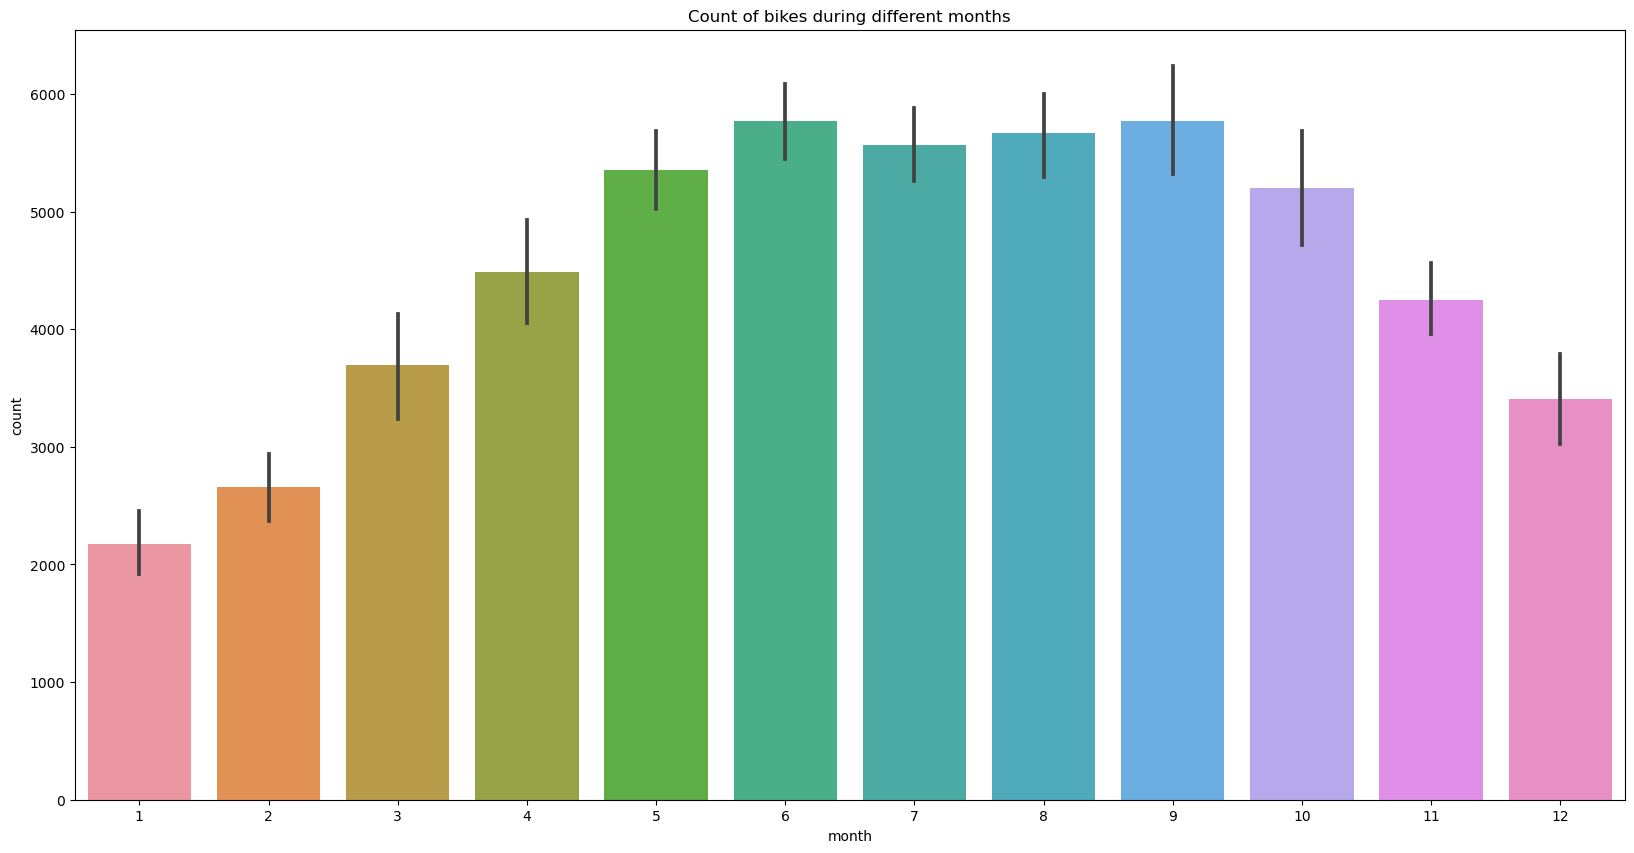

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')
plt.show()

### ~ Count of bikes during different days :

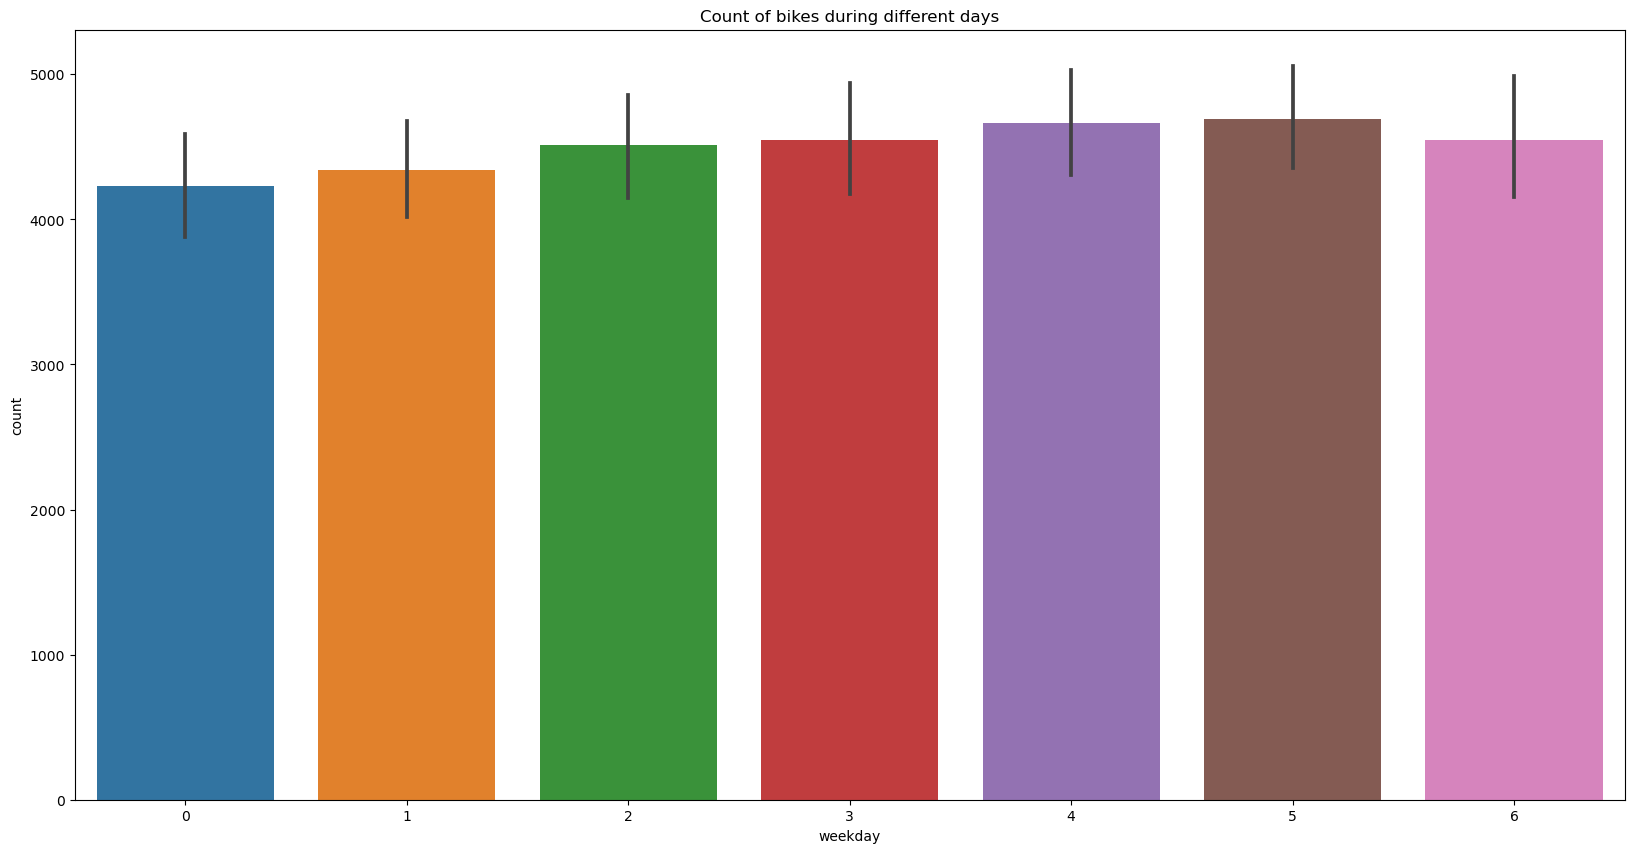

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')
plt.show()

### ~ Relation between temperature and users :

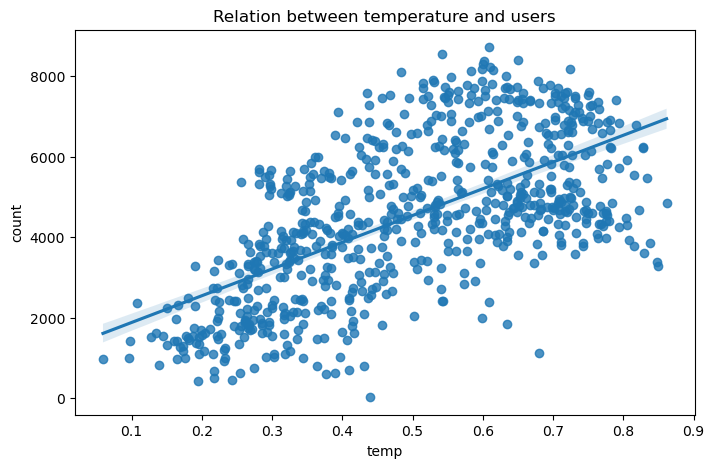

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df['temp'], y=df['count'],ax=ax)
ax.set(title="Relation between temperature and users")
plt.show()

### ~ Relation between humidity and users :

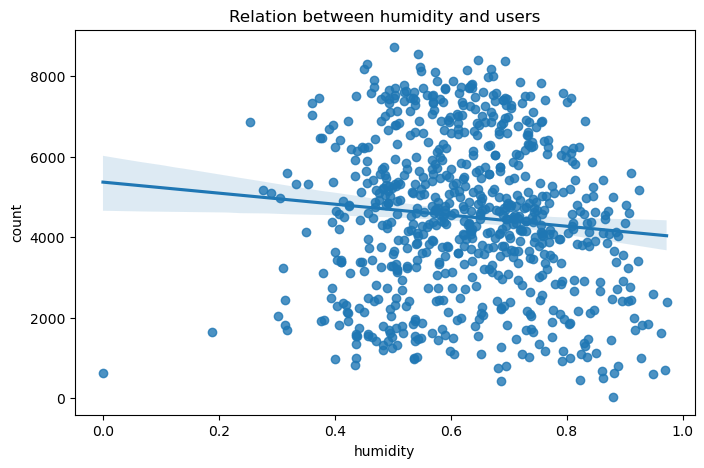

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df['humidity'], y=df['count'], ax=ax )
ax.set(title="Relation between humidity and users")
plt.show()

## Coorelation Matrix :

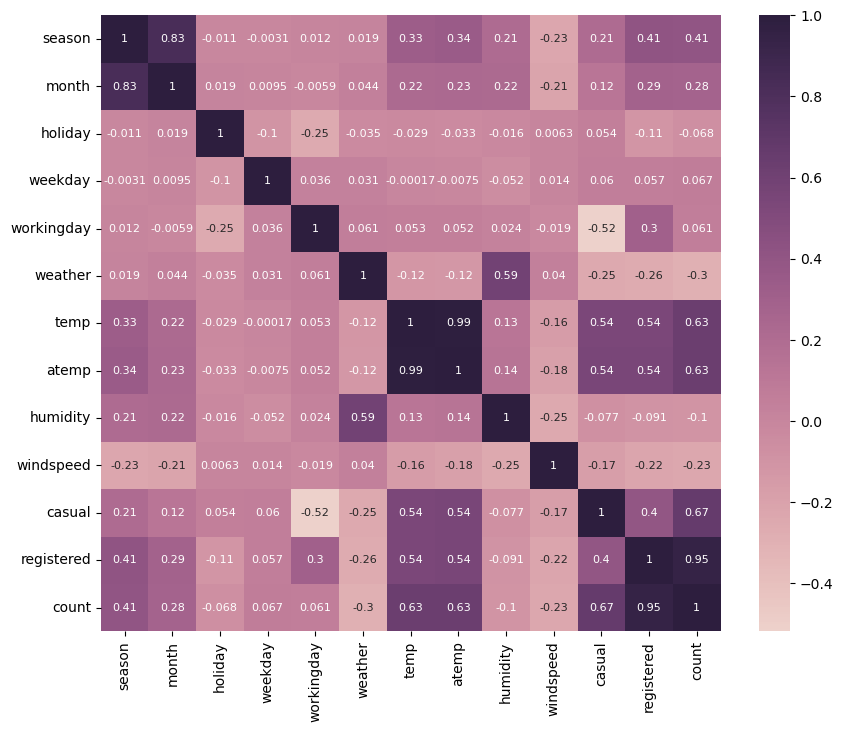

In [14]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap=sns.cubehelix_palette(as_cmap=True), annot=True, annot_kws={'size':8})
plt.show()

##### Lets check outliers in any :

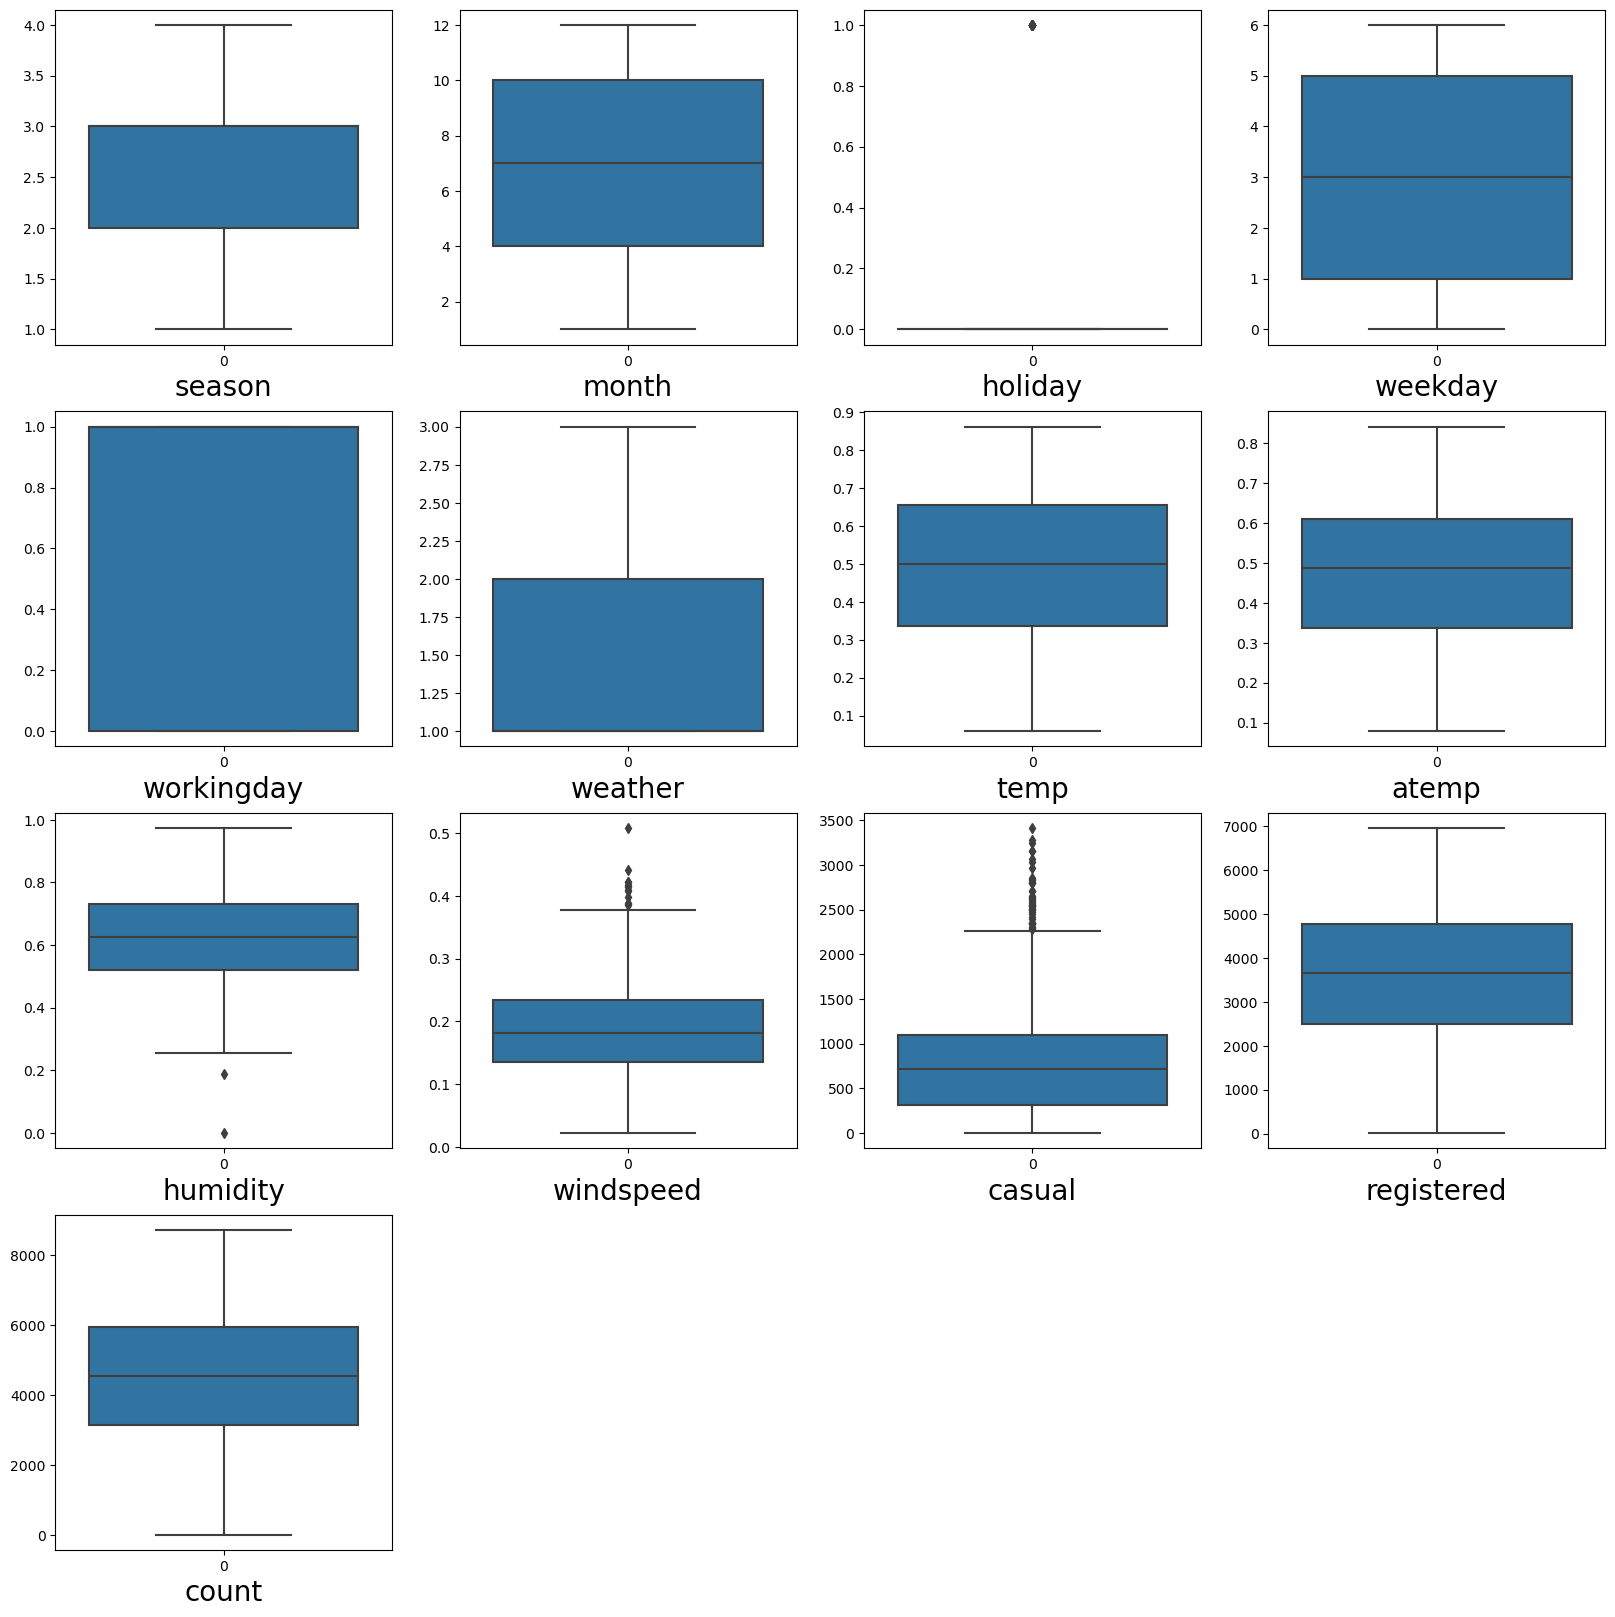

In [15]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :  
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Finding Outliers Using Z-Score :

##### We will be taking the values inside the range of -3 to +3 standard deviation

### ~ Finding out the Limits for humidity :

In [16]:
upper_limit = df['humidity'].mean()+3*df['humidity'].std()
lower_limit = df['humidity'].mean()-3*df['humidity'].std()
print(upper_limit)
print(lower_limit)

1.0551813483425585
0.2006067775124349


In [17]:
df.loc[(df['humidity']>upper_limit) | (df['humidity']<lower_limit)]

,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
49,1,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,1,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


### ~ Handling the outliers in humidity :

##### Replacing the oulier values to humidity's median :

In [18]:
df.loc[(df['humidity']>upper_limit) | (df['humidity']<lower_limit),'humidity']=df['humidity'].median()

### ~ Finding out the Limits for windspeed :

In [19]:
upper_limit = df['windspeed'].mean()+3*df['windspeed'].std()
lower_limit = df['windspeed'].mean()-3*df['windspeed'].std()
print(upper_limit)
print(lower_limit)

0.4229798236729153
-0.0420074004171013


In [20]:
df.loc[(df['windspeed']>upper_limit) | (df['windspeed']<lower_limit)]

,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
49,1,2,0,6,0,1,0.399167,0.391404,0.626667,0.507463,532,1103,1635
432,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382


### ~ Handling the outliers in windspeed :

##### Replacing the oulier values to windspeed's median :

In [21]:
df.loc[(df['windspeed']>upper_limit) | (df['windspeed']<lower_limit),'windspeed']=df['windspeed'].median()

### ~ Finding out the Limits for holiday :

In [22]:
upper_limit = df['holiday'].mean()+3*df['holiday'].std()
lower_limit = df['holiday'].mean()-3*df['holiday'].std()
print(upper_limit)
print(lower_limit)

0.5301919980452603
-0.47273645768958317


In [23]:
df.loc[(df['holiday']>upper_limit) | (df['holiday']<lower_limit)]

,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
16,1,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,1,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,2,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,2,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,3,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
247,3,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
282,4,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
314,4,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440,2928,3368
327,4,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
359,1,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317


##### Changing int columns to category :

In [24]:
categorical_day =  ['season', 'month', 'holiday', 'weekday','workingday', 'weather']

In [25]:
for cat in categorical_day:
    df[cat] = df[cat].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   month       731 non-null    category
 2   holiday     731 non-null    category
 3   weekday     731 non-null    category
 4   workingday  731 non-null    category
 5   weather     731 non-null    category
 6   temp        731 non-null    float64 
 7   atemp       731 non-null    float64 
 8   humidity    731 non-null    float64 
 9   windspeed   731 non-null    float64 
 10  casual      731 non-null    int64   
 11  registered  731 non-null    int64   
 12  count       731 non-null    int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 45.7 KB


In [27]:
df = pd.get_dummies(df,columns=['season', 'month', 'holiday', 'weekday','workingday', 'weather'],drop_first=True)
pd.set_option('display.max_columns', 500)
df.head(5)

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


# 4.Train Test Split

In [28]:
X = df.drop(columns=['atemp', 'registered', 'count'], axis=1)
Y = df['count']

In [29]:
X.head(5)

,temp,humidity,windspeed,casual,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [30]:
Y.head(5)

0     985
1     801
2    1349
3    1562
4    1600
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(731, 28) (584, 28) (147, 28)


## Feature Normalization

In [33]:
Continuous = ["temp","humidity",'windspeed','casual']

In [34]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler()

In [35]:
X_train[Continuous] = std.fit_transform(X_train[Continuous])
X_test[Continuous] = std.transform(X_test[Continuous])

In [36]:
X_traindf = pd.DataFrame(X_train, columns=X.columns)

X_traindf.head()

,temp,humidity,windspeed,casual,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
682,-0.864610,0.219621,1.980745,-0.773298,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
250,0.737288,2.201053,0.032785,-1.022045,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
336,-1.108087,-0.138494,-1.232358,-0.231485,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
260,0.040404,0.449408,-0.153337,0.693456,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
543,1.087829,-1.949958,1.063887,0.298891,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


# 5.Model Fitting

## I. Linear Regression :

In [37]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression() 

In [38]:
LR.fit(X_train,Y_train)  #object creation

LinearRegression()

In [39]:
y_predict = LR.predict(X_test) #training of linear regression

In [40]:
Y_train # Actual output values

682    4094
250    1842
336    3614
260    4274
543    7335
       ... 
71     2417
106    3744
270    3907
435    4911
102    2162
Name: count, Length: 584, dtype: int64

In [41]:
y_predict # Values predicted by model

array([5449.47505245, 2819.69799567, 4375.95178928, 5787.79952029,
       6416.76494877, 5564.12586364, 2687.85972534, 2710.90266813,
       6737.56393452, 5580.74379625, 1349.59287447, 3249.00305556,
       5033.57769497, 4148.39639161, 3488.26345783, 3044.40215094,
       3474.95018733, 7459.5696654 , 6301.37707631, 1230.70081672,
       6330.63020547, 5917.32782523, 4376.3748109 , 2797.22010688,
       2783.61521503, 5616.27721557, 3149.96946281, 6790.92570112,
       3115.76631497, 5091.14642358, 2914.22490836, 4942.0658138 ,
       4859.36375047, 5676.36658044, 4926.18600456, 3371.58072695,
       6318.1826157 , 5321.86498681, 3841.23862163, 2322.13983444,
       4697.32159608, 3066.73728402, 5973.56917562, 5084.09174592,
       5747.97316003, 2877.62966957, 5153.46106616, 4841.73858986,
       7455.71167307, 4132.3412025 , 4672.18816184, 2389.7389984 ,
       1161.87643457, 5384.62498983, 5196.68504006, 5500.70070476,
       4578.62338385, 3422.1970771 , 6431.35486769, 6343.44432

In [42]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 

In [43]:
r2score=r2_score(Y_test,y_predict)
r2score

0.7373345286202116

In [44]:
X_test.shape

(147, 28)

In [45]:
## calculation of adjusted r2 score
adjusted_r2_LR = 1-(1-0.72)*(147-10)/(147-10-1) 
adjusted_r2_LR

0.7179411764705882

## II. Decision Tree Regressor :

In [46]:
from sklearn.tree import DecisionTreeRegressor 

In [47]:
model = DecisionTreeRegressor(random_state=44)  

In [48]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=44)

In [49]:
predictions = model.predict(X_test)

In [50]:
r2score=r2_score(Y_test,predictions)
r2score

0.7154755724791926

In [51]:
## calculation of adjusted r2 score
adjusted_r2_DT = 1-(1-0.74)*(147-10)/(147-10-1) 
adjusted_r2_DT

0.7380882352941176

## III. Random Forest Regressor :

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 

In [54]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [55]:
predictions = model.predict(X_test)

In [56]:
y_predict=regressor.predict(X_test)

In [57]:
r2score=r2_score(Y_test,y_predict)
r2score

0.8124032930865116

In [58]:
## calculation of adjusted r2 score
adjusted_r2_RF = 1-(1-0.80)*(147-10)/(147-10-1) 
adjusted_r2_RF

0.7985294117647059

## IV. Gradient Boosting Regressor :

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbr=GradientBoostingRegressor(learning_rate=0.01, loss='squared_error', n_estimators=100)
gbr.fit(X_train,Y_train)
Y_predict=gbr.predict(X_test)

In [61]:
Y_predict = gbr.predict(X_test)
Y_predict

array([4496.48087554, 2812.0659476 , 4517.50190656, 5703.28052611,
       5292.1400599 , 5806.11847469, 2711.11140147, 3288.54182936,
       5806.11847469, 5263.11198844, 3021.80075643, 3615.23048944,
       4940.99863563, 3803.61288511, 4190.84515298, 4556.94463617,
       4190.84515298, 5806.11847469, 5806.11847469, 2764.93528515,
       5806.11847469, 5263.11198844, 4552.24645063, 3452.85099456,
       3225.0728109 , 5572.38526099, 3496.17989788, 5806.11847469,
       3126.16233448, 4498.27814022, 3518.40917076, 4551.92398668,
       4552.24645063, 5806.11847469, 5052.82514283, 5027.98402193,
       5806.11847469, 5027.98402193, 3430.032982  , 2711.11140147,
       4552.24645063, 3333.800403  , 5806.11847469, 5027.98402193,
       5806.11847469, 2858.44180853, 5263.11198844, 5263.11198844,
       5942.36128332, 4817.69717632, 5027.98402193, 3261.54369949,
       2868.51851087, 5027.98402193, 4552.24645063, 5263.11198844,
       3758.96947088, 4817.69717632, 5421.14376515, 5806.11847

In [62]:
rfr_r2score = r2_score(Y_test,Y_predict)
rfr_r2score

0.5961057275560232

In [63]:
adjusted_r2_GB = 1-(1-0.59)*(147-10)/(147-10-1) 
adjusted_r2_GB

0.586985294117647

# 6. Output Final Score

In [64]:
final_df1 = pd.DataFrame({'MODELS':['LG','DT','RF','GB'],
                        'ACCURACY':[adjusted_r2_LR,adjusted_r2_DT,adjusted_r2_RF,adjusted_r2_GB]})

In [65]:
final_df1

,MODELS,ACCURACY
0,LG,0.717941
1,DT,0.738088
2,RF,0.798529
3,GB,0.586985


<Axes: xlabel='MODELS', ylabel='ACCURACY'>

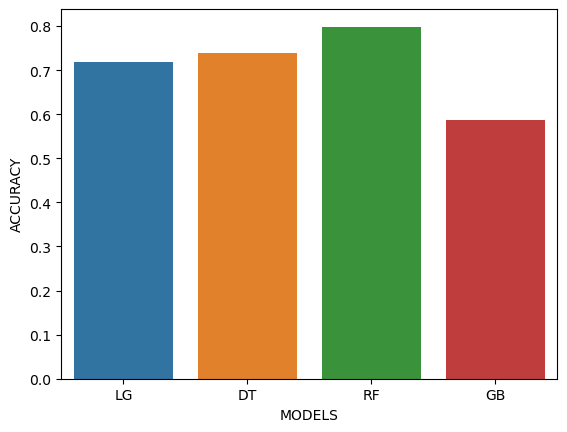

In [66]:
sns.barplot(x=final_df1['MODELS'],y=final_df1['ACCURACY'])

# 7. Model Comparison Report

# Conclusion :
    1. LINEAR REGRESSION
       > r2score = 0.73
       > adjusted_r2 = 0.71

    2. DECISION TREE REGRESSOR
       > r2score = 0.71
       > adjusted_r2 = 0.73

    3. RANDOM FOREST REGRESSOR
       > r2score = 0.81
       > adjusted_r2 = 0.79

    4. Gradient Boosting Regressor
       > r2score = 0.59     
       > adjusted_r2 = 0.58